In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Assume 'dataset.csv' is the file you'll load externally
data = pd.read_csv('bank.csv', sep=";")

In [3]:
# Remove 'day' and 'month' columns (based on your preference to exclude date-related columns)
data = data.drop(['day', 'month'], axis=1)

# Preprocess categorical columns using Label Encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store label encoder for future use

In [4]:
# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target (Purchase decision)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [5]:

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(report)

Accuracy: 86.07%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1205
           1       0.40      0.46      0.43       152

    accuracy                           0.86      1357
   macro avg       0.66      0.69      0.67      1357
weighted avg       0.87      0.86      0.87      1357



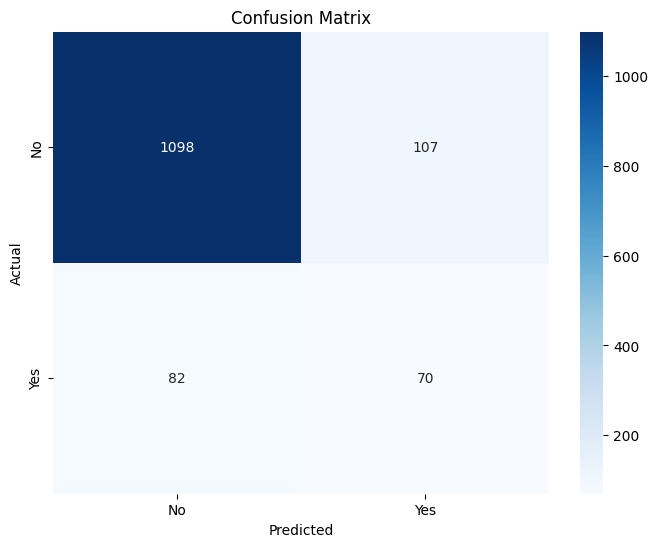

In [6]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()